# Analyze Text Data with Yellowbrick

In [1]:
from yellowbrick.datasets import load_hobbies

/Users/elizabethlorelei/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load the Corpus

In [2]:
corpus = load_hobbies()

In [3]:
corpus.url

'https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip'

In [4]:
corpus.data

['- Nintendo president Tatsumi Kimishima\n\nThe upcoming Nintendo NX system will not be sold at a loss.\n\nThe quote above comes from company president Tatsumi Kimishima, speaking at the company\'s latest investor meeting.\xa0\n\nWhile that might sound like an obvious move, it\'s not as simple as you\'d expect. For one, new video game consoles -- from all manufacturers -- are often sold at a loss during their launch period.\xa0\n\nCase in point: The Wii U, Nintendo\'s current hardware, was. In an investor Q&A from 2014, late president Satoru Iwata refers to "the loss arising due to the hardware production costs being higher than our trade price."\n\nThis flies in the face of Nintendo\'s longtime hardware design philosophy, as credited to the late Gunpei Yokoi, most notably the hardware lead on the original Game Boy. He coined the phrase "lateral thinking with withered technology," which refers to using low-cost, mature tech in products, and the company has used this philosophy in\xa0ma

### Vectorize the Documents

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
docs = vectorizer.fit_transform(corpus.data)
labels = corpus.target

In [6]:
docs.shape

(448, 20140)

### t-SNE: Clustering Similar Documents with Squared Euclidean Distance and Euclidean Distance

### L2 Squared Euclidean Distance

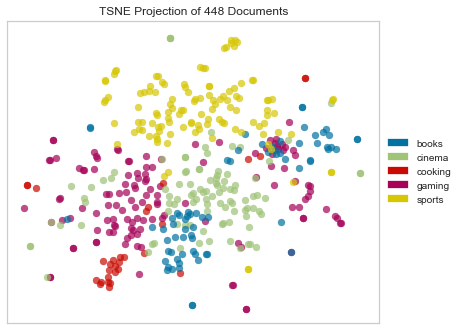

In [7]:
from yellowbrick.text import TSNEVisualizer

tsnse = TSNEVisualizer(size = (600, 400)) # L2 Squared Euclidean Distance
tsnse.fit(docs, labels)
tsnse.poof()

### Euclidean Distance

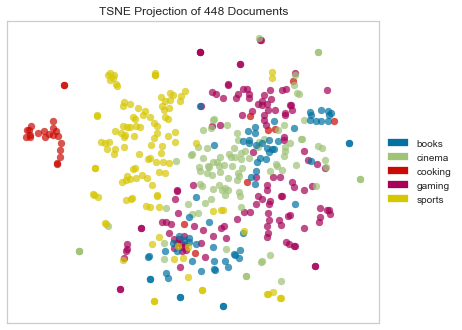

In [8]:
tsnse = TSNEVisualizer(size = (600, 400), metrics = "euclidean") # Euclidean Distance
tsnse.fit(docs, labels)
tsnse.poof()

### Manhattan ("Taxicub" or "Cityblock") Distance

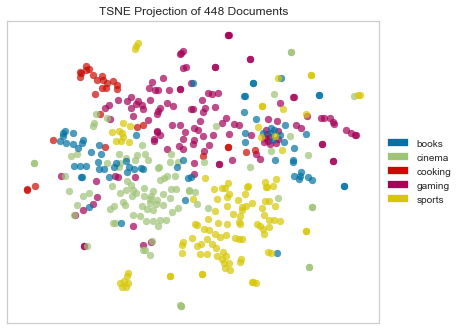

In [9]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "citycub")
tsne.fit(docs, labels)
tsne.poof()

### Bray Curtis Dissimilarity

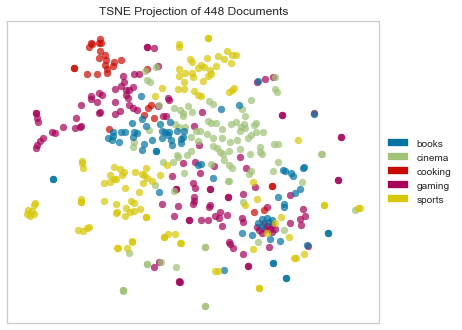

In [10]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "braycurtis")
tsne.fit(docs, labels).poof()

### Canberra Distance

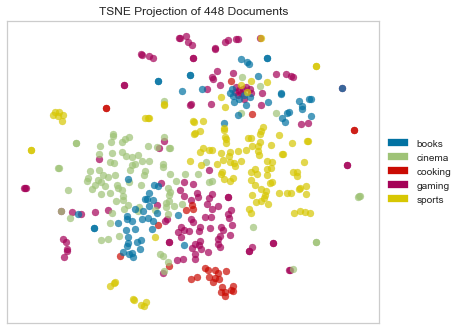

In [11]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "canberra")
tsne.fit(docs, labels).poof()

### Cosine Distance

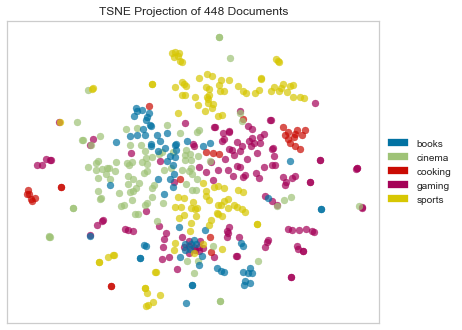

In [12]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "cosine")
tsne.fit(docs, labels).poof()

### - Sokal-Michener dissimilarity 
### - Rogers-Tanimoto dissimilarity
### - Hamming distance

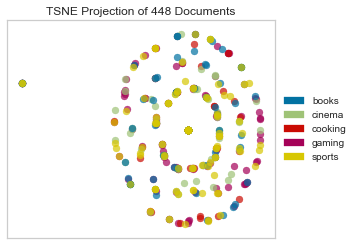

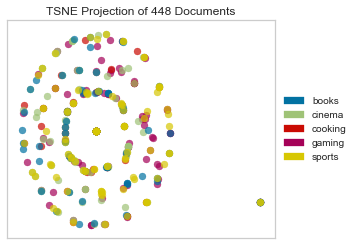

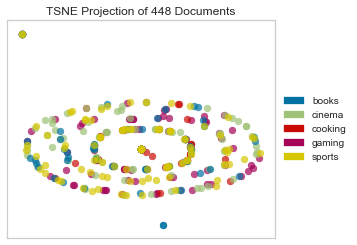

In [13]:
distance_functions = ["sokalmichener", "rogerstanimoto", "hamming"]
for metric in distance_functions:
    tsne = TSNEVisualizer(metric = metric)
    tsne.fit(docs, labels).poof()

### Omitting Class Labels - Using KMeans Clusterring

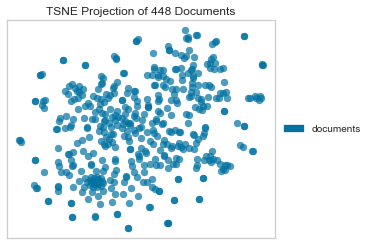

In [14]:
# Dont color points with their classes

tsne = TSNEVisualizer(labels = ["documents"])
tsne.fit(docs).poof()

In [15]:
# Apply clustering instead of class names

from sklearn.cluster import KMeans

clusters = KMeans(n_clusters = 5)
clusters.fit(docs)

tsne = TSNEVisualizer(size = (800, 600))
tsne.make_transformer()
#tsne.values.reshape(1, -1)
tsne.fit(["c{}".format(c) for c in clusters.labels_])
tsne.poof()

ValueError: Expected 2D array, got 1D array instead:
array=['c2' 'c2' 'c0' 'c0' 'c2' 'c1' 'c2' 'c1' 'c2' 'c1' 'c2' 'c0' 'c1' 'c1'
 'c1' 'c2' 'c0' 'c2' 'c2' 'c1' 'c0' 'c1' 'c2' 'c2' 'c1' 'c2' 'c2' 'c1'
 'c1' 'c2' 'c2' 'c1' 'c1' 'c2' 'c1' 'c2' 'c1' 'c1' 'c1' 'c1' 'c2' 'c1'
 'c1' 'c1' 'c1' 'c3' 'c1' 'c0' 'c2' 'c0' 'c1' 'c2' 'c2' 'c0' 'c2' 'c0'
 'c0' 'c1' 'c0' 'c2' 'c2' 'c1' 'c1' 'c0' 'c1' 'c0' 'c1' 'c1' 'c2' 'c2'
 'c1' 'c1' 'c1' 'c0' 'c1' 'c2' 'c1' 'c0' 'c2' 'c2' 'c1' 'c1' 'c1' 'c2'
 'c1' 'c0' 'c2' 'c2' 'c2' 'c2' 'c1' 'c0' 'c1' 'c1' 'c2' 'c2' 'c2' 'c2'
 'c1' 'c2' 'c2' 'c1' 'c1' 'c1' 'c1' 'c1' 'c4' 'c1' 'c1' 'c0' 'c2' 'c0'
 'c1' 'c2' 'c0' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c1' 'c1' 'c2' 'c1' 'c2'
 'c1' 'c1' 'c2' 'c2' 'c2' 'c1' 'c4' 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c1'
 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c4'
 'c2' 'c2' 'c2' 'c2' 'c3' 'c2' 'c1' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c2'
 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c1' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2'
 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c2'
 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2'
 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2'
 'c2' 'c2' 'c2' 'c0' 'c0' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c0'
 'c0' 'c0' 'c0' 'c0' 'c2' 'c2' 'c2' 'c2' 'c1' 'c2' 'c2' 'c0' 'c2' 'c2'
 'c0' 'c2' 'c2' 'c3' 'c2' 'c0' 'c0' 'c0' 'c2' 'c0' 'c0' 'c0' 'c2' 'c0'
 'c0' 'c0' 'c2' 'c0' 'c2' 'c0' 'c2' 'c2' 'c0' 'c0' 'c2' 'c0' 'c2' 'c0'
 'c2' 'c0' 'c0' 'c0' 'c2' 'c0' 'c1' 'c0' 'c2' 'c0' 'c2' 'c2' 'c2' 'c2'
 'c0' 'c0' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c0' 'c0' 'c2'
 'c0' 'c2' 'c2' 'c2' 'c2' 'c0' 'c2' 'c0' 'c2' 'c1' 'c2' 'c4' 'c2' 'c0'
 'c0' 'c2' 'c2' 'c2' 'c0' 'c2' 'c2' 'c2' 'c3' 'c0' 'c2' 'c2' 'c2' 'c3'
 'c2' 'c3' 'c3' 'c3' 'c3' 'c2' 'c2' 'c0' 'c2' 'c3' 'c0' 'c2' 'c3' 'c0'
 'c3' 'c3' 'c2' 'c3' 'c2' 'c0' 'c2' 'c3' 'c1' 'c2' 'c2' 'c2' 'c0' 'c2'
 'c3' 'c3' 'c3' 'c3' 'c3' 'c3' 'c3' 'c3' 'c0' 'c3' 'c0' 'c3' 'c2' 'c3'
 'c3' 'c0' 'c3' 'c2' 'c3' 'c3' 'c3' 'c2' 'c3' 'c3' 'c0' 'c3' 'c2' 'c0'
 'c2' 'c0' 'c2' 'c2' 'c3' 'c2' 'c2' 'c0' 'c3' 'c0' 'c3' 'c3' 'c3' 'c3'
 'c3' 'c2' 'c2' 'c3' 'c0' 'c2' 'c3' 'c3' 'c2' 'c3' 'c2' 'c3' 'c0' 'c3'
 'c3' 'c3' 'c2' 'c3' 'c2' 'c3' 'c2' 'c3' 'c2' 'c3' 'c3' 'c3' 'c3' 'c0'
 'c3' 'c3' 'c2' 'c0' 'c3' 'c2' 'c3' 'c3' 'c3' 'c3' 'c3' 'c3' 'c0' 'c3'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 800x600 with 0 Axes>